# Lab 1
## Dynamic model of a multi-link manipulator

## Steps

### 0. Import the necessary libraries

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt

In [6]:

print(dir(rtb.models.DH))     # for DH-based models
print(dir(rtb.models.URDF))   # for URDF-based models



['AL5D', 'Ball', 'Baxter', 'Cobra600', 'Coil', 'Hyper', 'Hyper3d', 'IRB140', 'Jaco', 'KR5', 'LWR4', 'Mico', 'Orion5', 'P8', 'Panda', 'Planar2', 'Planar3', 'Puma560', 'Sawyer', 'Stanford', 'TwoLink', 'UR10', 'UR3', 'UR5', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
['AL5D', 'Fetch', 'FetchCamera', 'Frankie', 'FrankieOmni', 'KinovaGen3', 'LBR', 'Mico', 'PR2', 'Panda', 'Puma560', 'UR10', 'UR3', 'UR5', 'Valkyrie', 'YuMi', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'px100', 'px150', 'rx150', 'rx200', 'vx300', 'vx300s', 'wx200', 'wx250', 'wx250s']


### 1. Import robot model (KUKA KR5)

In [3]:
#robot = rtb.models.UR5()
#robot = rtb.models.UR3()
#robot = rtb.models.UR10()
#print("Robot name:", robot.name)
#print("Number of joints:", robot.n)
#print("Link names:", [link.name for link in robot.links])

In [13]:
from roboticstoolbox.models.DH import KR5

robot = KR5()
print(robot)


DHRobot: KR5 (by KUKA), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌─────┬────────┬──────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼────────┼──────┼────────┼─────────┼────────┤
│  q1 │    0.4 │ 0.18 │ -90.0° │ -155.0° │ 155.0° │
│  q2 │      0 │  0.6 │   0.0° │ -180.0° │  65.0° │
│  q3 │      0 │ 0.12 │  90.0° │  -15.0° │ 158.0° │
│  q4 │  -0.62 │    0 │ -90.0° │ -350.0° │ 350.0° │
│  q5 │      0 │    0 │  90.0° │ -130.0° │ 130.0° │
│  q6 │ -0.115 │    0 │ 180.0° │ -350.0° │ 350.0° │
└─────┴────────┴──────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ name │ q0   │ q1   │ q2   │ q3   │ q4   │ q5   │
├──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│   qr │  45° │  60° │  45° │  30° │  45° │  30° │
│   qz │  0°  │  0°  │  0°  │  0°  │  0°  │  0°  │
│  qk1 │  45° │  60° │  45° │  30° │  45° │  30° │
│  qk2 │  45° │  60° │  30° │  60° │  45° │  30° │
│  qk3 │  30° │  60

### 2. Fill in the parameters of the robot model

0. Using dyn() you can view the dynamic parameters of each link

In [14]:
print(robot.links[0].dyn())  # initial dynamic parameters of the first link

m     =         0 
r     =         0        0        0 
        |        0        0        0 | 
I     = |        0        0        0 | 
        |        0        0        0 | 
Jm    =         0 
B     =         0 
Tc    =         0(+)        0(-) 
G     =         0 
qlim  =      -2.7 to      2.7


1. Let's define the mass of the links

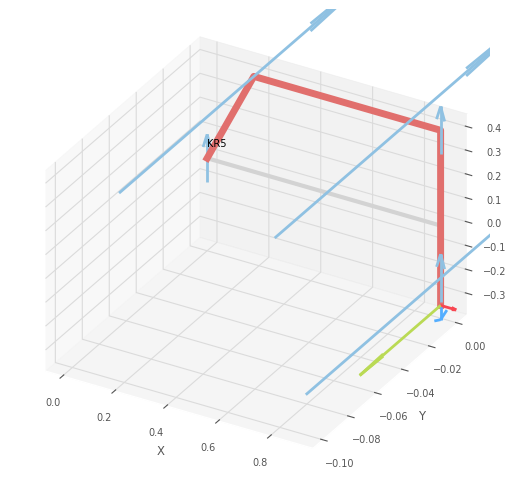

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KR5')

<Figure size 640x480 with 0 Axes>

In [15]:
robot.plot(robot.qz) 

In [16]:
robot.links[0].m = 1
robot.links[1].m = 1.4
robot.links[2].m = 0.65
robot.links[3].m = 0.82
robot.links[4].m = 0.34
robot.links[5].m = 0.09

2. Let's define the center of mass of each link

In [17]:
robot.links[0].r = [0, 0, 0]
robot.links[1].r = [-0.3638, 0.006, 0.2275]
robot.links[2].r = [-0.0203, -0.0141, 0.07]
robot.links[3].r = [0, 0.019, 0]
robot.links[4].r = [0, 0, 0]
robot.links[5].r = [0, 0, 0.032]

3. Let's define the inertia tensor of each link. Filling: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]

In [18]:
robot.links[0].I = [0, 0.35, 0, 0, 0, 0]
robot.links[1].I = [0.13, 0.524, 0.539, 0, 0, 0]
robot.links[2].I = [0.066, 0.086, 0.0125, 0, 0, 0]
robot.links[3].I = [0.0018, 0.0013, 0.0018, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0.0003, 0, 0, 0]
robot.links[5].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]

4. Let's set the moment of inertia of the drive

In [19]:
robot.links[0].Jm = 0.0004
robot.links[1].Jm = 0.0004
robot.links[2].Jm = 0.0004
robot.links[3].Jm = 0.000033
robot.links[4].Jm = 0.000033
robot.links[5].Jm = 0.000033

5. Let's define the coefficient of viscous friction of the drive

In [20]:
robot.links[0].B = 0.0015
robot.links[1].B = 0.000817
robot.links[2].B = 0.00138
robot.links[3].B = 0.0000712
robot.links[4].B = 0.0000826
robot.links[5].B = 0.0000367

6. Let's define the coefficient of Coulomb friction of the drive

In [21]:
robot.links[0].Tc = [0.395, -0.435]
robot.links[1].Tc = [0.126, -0.071]
robot.links[2].Tc = [0.132, -0.105]
robot.links[3].Tc = [0.0112, -0.0169]
robot.links[4].Tc = [0.00926, -0.0145]
robot.links[5].Tc = [0.00396, -0.0105]

7. Let's set the gear ratio for each link

In [22]:
# Motor gear ratios (G)
robot.links[0].G = -62.6111
robot.links[1].G = 107.815
robot.links[0].G = -62.6111
robot.links[1].G = 107.8150000000000
robot.links[2].G = -53.7063
robot.links[3].G = 76.0364
robot.links[4].G = 71.923
robot.links[5].G = 76.686

8. Let's set restrictions on the generalized coordinates for each link

In [23]:
robot.links[0].qlim = [-2.792526803190927, 2.792526803190927]
robot.links[1].qlim = [-0.785398163397448, 3.926990816987241]
robot.links[2].qlim = [-3.926990816987241, 0.785398163397448]
robot.links[3].qlim = [-1.919862177193763, 2.967059728390360]
robot.links[4].qlim = [-1.745329251994330, 1.745329251994330]
robot.links[5].qlim = [-4.642575810304916, 4.642575810304916]

### 3. Set the initial and final positions of the robot and plot them

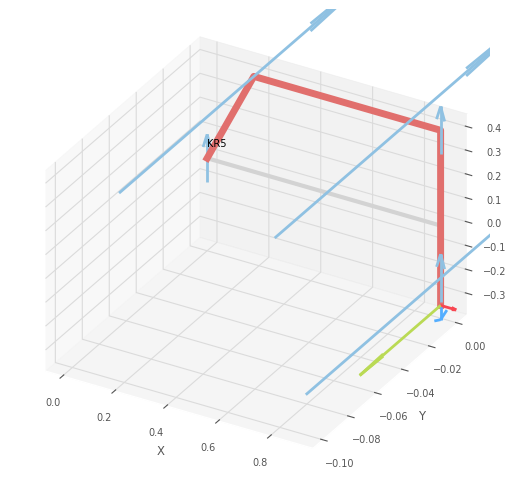

<Figure size 640x480 with 0 Axes>

In [30]:
q_start = [0, 0, 0, 0, 0, 0]
robot.plot(q_start)
plt.show()

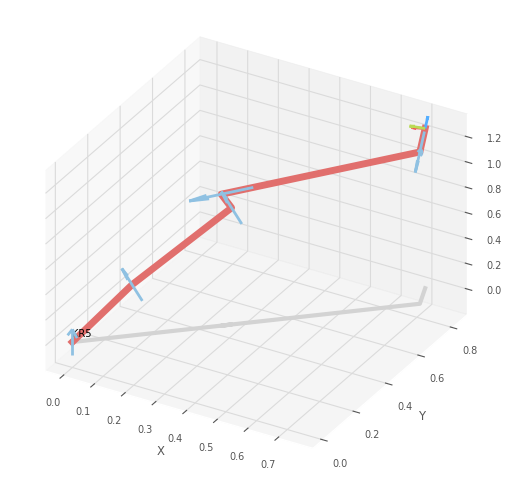

<Figure size 640x480 with 0 Axes>

In [31]:
q_end = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_end)
plt.show()

### 4. Plan the trajectory with prebuilt functions

In [26]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)
tr = rtb.jtraj(q_start, q_end, time)

### 5. Solve the inverse dynamics

In [27]:
tau = robot.rne(tr.q, tr.qd, tr.qdd).T

tau0 = robot.rne(tr.q, np.zeros([N,6]), np.zeros([N,6])).T

### 6. Obtain the components of the dynamic equation

In [28]:
M = robot.inertia(tr.q)
C = robot.coriolis(tr.q, tr.qd)
G = robot.gravload(tr.q)

M0 = robot.inertia(tr.q)
C0 = robot.coriolis(tr.q, np.zeros([N,6]))
G0 = robot.gravload(tr.q)

### 7. Plot the graphs

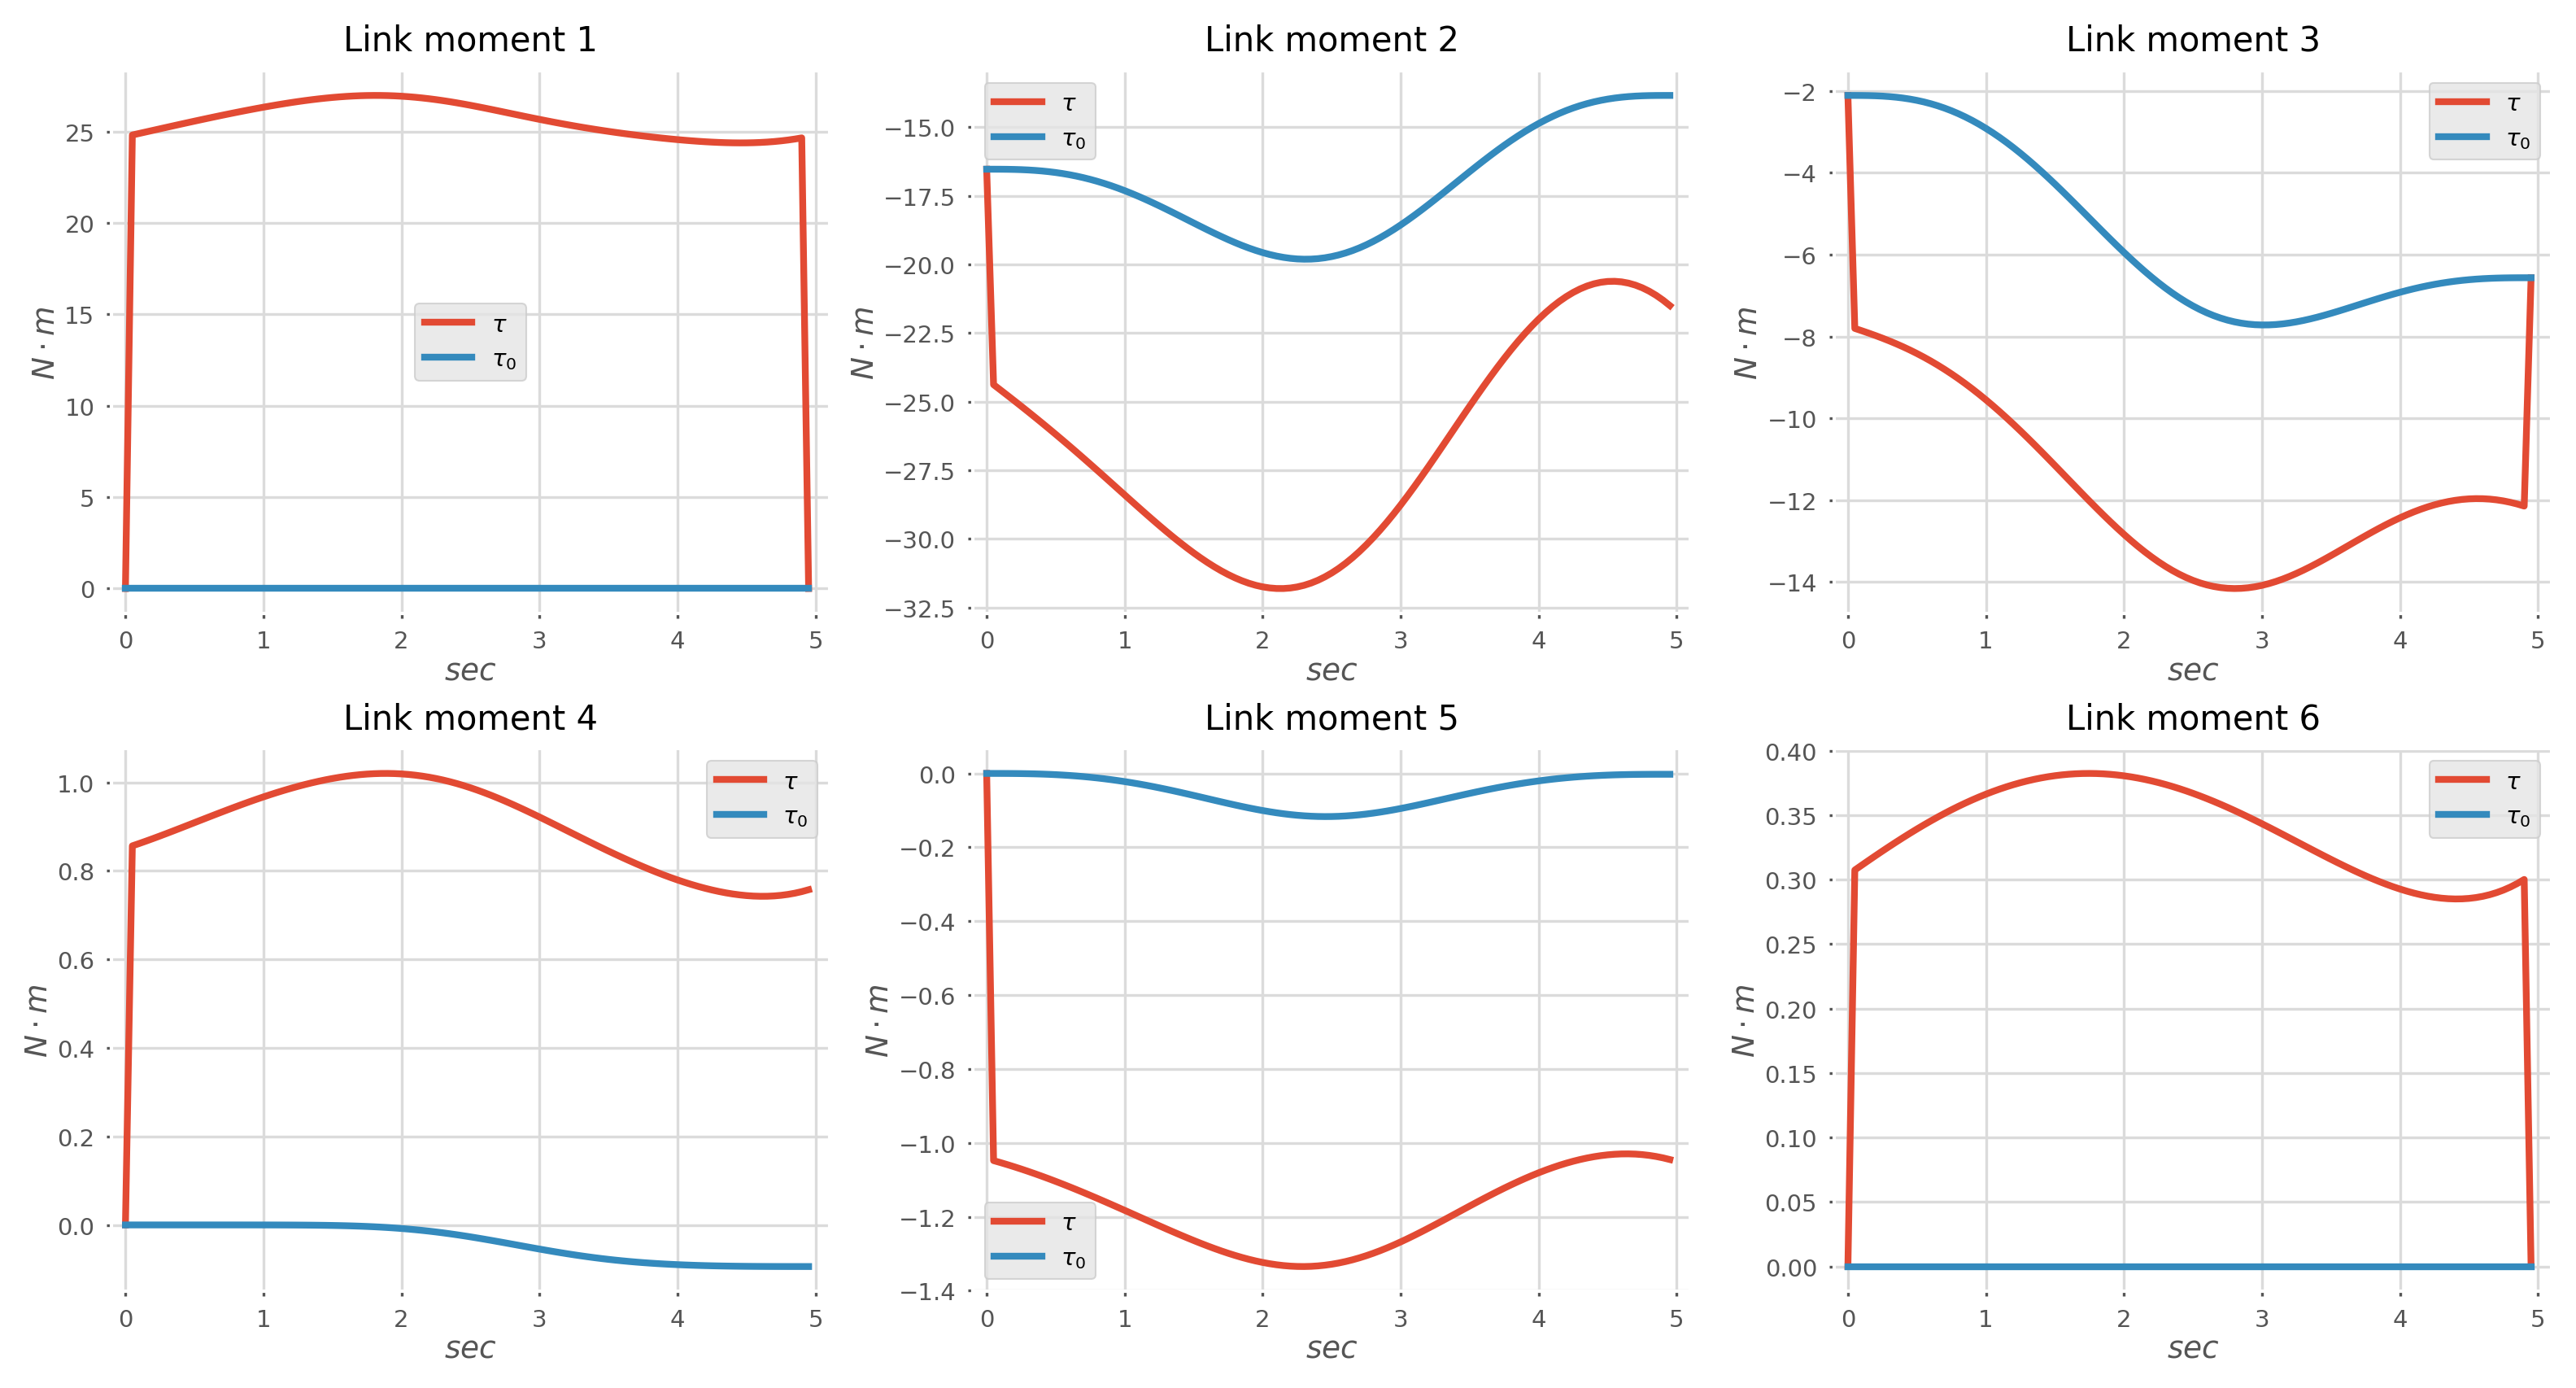

In [ ]:
plt.figure(figsize=(10,5), dpi=300)  
for g in range(6):
    plt.subplot(2,3,g+1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  
    plt.plot(time, tau[g], linewidth=2, label=r"$\tau$")  
    plt.plot(time, tau0[g], linewidth=2, label=r"$\tau_{0}$")  
    plt.title(r"Link moment {}".format(g+1), fontsize=10)  
    plt.ylabel(r"$N \cdot m$", fontsize=9)  
    plt.xlabel(r"$sec$", fontsize=9)  
    plt.grid(True)  
    plt.legend()  
    ax = plt.gca()  
    ax.set_facecolor((1,1,1))  
    ax.set_xlim([t_start-0.1,t_stop+0.1])  
plt.show()